<a href="https://colab.research.google.com/github/ohhongseok/ML-DeepLearning/blob/main/3/3-3/%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이번장 키워드 및 핵심 
 - 다중회귀 / 특성공학 / 릿지/ 라쏘 / 하이퍼파라미터
 - 다중회귀 : 여러개의 특성을 사용한 선형회귀 (평면 모델)
  > 선형회귀 : 하나의 특성을 사용한 선형 회귀 모델 (직선 모델)
 - 특성공학 : 기존의 특성을 이용해 새로운 특성을 뽑아내는 작업을 특성공학이라 한다.


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://bit.ly/perch_csv_data')

df.head(10)
# 특성데이터 무게, 높이, 길이 값(특성이 3개로 늘어남)
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
# 타겟 데이터
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# 타겟데이터와 트레이닝 데이터로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input ,train_target,test_target = train_test_split(perch_full,perch_weight,random_state=42)

#train_test_split()
 - sklearn 내의 model_selection 패키지 안에 있는 모듈이다.
 - 모듈안에 들어가는 옵션값은 아래와 같다.
  > data : 전체 학습 데이터, 이 예제에서는 perch_full 이다. <br>
  > target : 전체 학습데이터에 대한 target(결과값), 이 예제에서는 perch_weight 이다.<br>
  > test_size : 테스트셋 구성비율, test_size=0.2는 테스트데이터를 전체 데이터셋중 20% 로 한다는 것 이며, 자동으로 train_tize는 0.8(80%)가 된다. 기본 default 값은 test_size = 0.25 이다.<br>
  > shuffle : 데이터를 나누기 이전, 데이터를 섞을지의 여부를 나타낸다. 기본은 True 이다. <br>
  > startify : 해당 옵션값은 분류에서 사용되며, class의 비율을 한쪽에 쏠리지 않게 해준다. (train 내의 0 /1 test 내의 0 / 1) 기본은 None 이다.<br>
  > random_state : 세트를 섞을때 해당 int 값을 보고 섞으며, 이 값으 고정해 두고 튜닝해야 메번 데이터셋이 변경되는것을 방지할 수 있다. 

In [4]:
# 사이킷런의 변환기
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures

 - 사이킷런이 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공해주는 모듈
 - 이러한 클래스를 변환기(transformer) 라고 한다.
 - 변환기에는 아래와 같은 메서드를 제공한다.
  > .fit() : 새롭게 만들 특성조합을 찾는다. <br>
  > .transform() : 실제로 데이터를 변환한다. <br>
 - 주의 : 반드시 fit()을 먼저 진행하여 찾은 후에 transform을 진행해야 한다. 
  > add. 두 메서드를 합친 fit_transform도 존재한다. 

In [5]:
poly = PolynomialFeatures()
poly.fit([[2,3]]) # 새롭게 만들 특성조합을 찾기

print(poly.transform([[2,3]])) # 위에서 fit으로 찾은 특성을 활용해 실제로 특성 데이터를 변환한다.
# 이 예제에서는 총 6개의 특성이 새로 생긴다.


[[1. 2. 3. 4. 6. 9.]]


# 특성에 대한 add

 - 1이 생긴 이유에 대해
  > 위의 특성을 통해 다항 회귀식을 보면 다음과 같다. <br>
  무게 = a*길이 + b*높이 + c*두께 +d*1 <br>
  선형방정식에서 절편(d)는 항상 1과 곱해지는 값 이다. 하지만 사이킷 런 내에서 자동으로 절편을 추가 하므로, 굳이 새롭게 특성을 찾아서 만들 필요가 없다.(fit 내에서  1이 나오지 않아도 된다.)<br>
  따라서 `poly = PolynomialFeatures(include_bias = False)` 를 추가하여 1을 제와한 새로운 특성을 만든다.


In [6]:
poly = PolynomialFeatures(include_bias = False) # 1의 특성을 빼도록 파라미터 추가 
poly.fit([[2,3]]) # 다시 특성 찾고
print(poly.transform([[2,3]])) # 특성 결과 출력
# 이렇게 하면 1을 제외한 나머지 신규 특성들이 생성된다.

[[2. 3. 4. 6. 9.]]


In [7]:
# 신규 특성을 생성하는 fit() / transform()을 실제 데이터에서 활용
poly.fit(train_input) # 기존 특성 3개
train_poly = poly.transform(train_input)
print("배열의  shape : " , train_poly.shape) # 총 데이터 42개, 9개의 특성을 가지고 있음을 알 수 있음

print("생성된 입력조합 : ", poly.get_feature_names_out()) # 기존 함수에서는 get_feature_name() 이였음


배열의  shape :  (42, 9)
생성된 입력조합 :  ['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [8]:
# 테스트세트의 변환
poly.fit(test_input)
test_poly = poly.transform(test_input)
print("배열의  shape : " , test_poly.shape)

배열의  shape :  (14, 9)


In [9]:
# 학습 on
# 사이킷런 선형 모델안 선형 회귀를 사용한다.
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_poly,train_target) #트레이닝 데이터 및 타겟데이터로 학습


LinearRegression()

In [10]:
# 각 데이터에 대한 결정계수 확인해보기
print("학습데이터에 대한 점수 결과 : ",lr.score(train_poly,train_target))

print("테스트데이터에 대한 점수 결과 :",lr.score(test_poly,test_target))

학습데이터에 대한 점수 결과 :  0.9903183436982124
테스트데이터에 대한 점수 결과 : 0.9714559911594132


 - 그러면 생각을 해보자
 - 특성값이 많아질수록 정확도는 더 높아지는거 아닐까?
 - 기존 2제곱까지만이였던 특성 결과에 3제곱, 4제곱을 넣어보자
 - 다행스럽게도 PolynomialFeatures()는 고차항의 최대 차수를 지정할 수 있다.
  > `PolynomialFeatures(degree = 5 )` 처럼 최대 차수를 정할 수 있다.(degree=5) -> 5차항  

In [11]:
poly = PolynomialFeatures(include_bias=False, degree=5)
poly.fit(train_input)
train_poly = poly.transform(train_input)
poly.fit(test_input)
test_poly = poly.transform(test_input)

print("바뀐 폴리노미얼 트레이닝 값 : ",train_poly.shape)
print("바뀐 폴리노미얼 테스트 값 : ",test_poly.shape)

# 특성이 55개나 생성됨 결과도 좋겠지?

바뀐 폴리노미얼 트레이닝 값 :  (42, 55)
바뀐 폴리노미얼 테스트 값 :  (14, 55)


In [12]:
#바뀐 차수의 데이터 학습
lr.fit(train_poly,train_target)


#바뀐 차수의 각 데이터에 대한 결정계수 확인해보기
print("학습데이터에 대한 점수 결과 : ",lr.score(train_poly,train_target))

print("테스트데이터에 대한 점수 결과 :",lr.score(test_poly,test_target))

학습데이터에 대한 점수 결과 :  0.9999999999991096
테스트데이터에 대한 점수 결과 : -144.40579242335605


# Insight
 - 여기서 알 수 있듯이 특성 개수를 높이면 선형 모델은 좋은 성능을 낸다. 따러서 학습 데이터에 대해서는 완벽에 가까운 데이터를 내놓는다.
 - 하지만 테스트 데이터에서는 과대적합이 되어버려 형편없는 점수를 내놓게 된다.  
  > 과대적합 : 데이터셋에 지나치게 최적화 되어 데이터셋에서는 높은 점수를 내지만, 새로운 데이터(테스트 셋, 새로운 샘플)에 <br>대해서는 정확한 동작을 수행하지 못한다.
 - 따라서 위의 문제를 해결하기 위해선 ***과대적합***의 문제를 해결해야 한다. -> 아래쪽 Solution 참고

add. 샘플개수보다 특성의 개수가 많다면? 
 - 과녁은 10개인데 맞출수 있는 총알은 2개다와 같다. 

# Solution - 규제(regularization)
 - 규제 : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 막는것 -> ***모델이 과대적합되지 않도록 만드는 것***
 - 선형회귀 모델의 경우 규제는 계수(기울기)의 크기를 작게 만드는 것 이다.
 - 기본적인 아이디어는 다음과 같다.
  > 모델 내 샘플에 대해 하나하나 정확한 값을 학습하는것이 아닌, 규제를 통해 기울기(학습율) 완화를 통해 보편적인 패턴을 <br> 학습하는 것 이다.
 - 규제를 하기 전 계수의 값의 크기가 서로 많이 다르면 공정하게  제어되지 않을 수 있다. 따라서 정규화를 통해 정확한 결과를 내야 한다.
 - 선형 회귀 모델에서 규제를 추가한 모델을 릿지(ridge)와 랏쏘(lasso) 라고 한다.(두 모델의 차이는 아래에서 자세히 설명)


In [13]:
# 앞장에서 했던 정규화 방법이 아닌, 
# sklearn 내 StandardScaler 모듈을 사용해 정규화 진행 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지와 라쏘
 - 두 모듈 모두 sklearn.linear_model 안에 들어 있다.
  > `from sklearn.linear_model import Ridge`<br>
  > `from sklearn.linear_model import Lasso`
 - 많은 특성(앞에 예시의 55개)을 사용해도 규제를 통해 훈련세트에 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있다.
 - 릿지와 라쏘 모델은 규제의 양을 임의로 조절할 수 있다.이는 alpha 매개변수를 통해 규제의 강도를 정하는데, <br>alpha값이 커지면 규제의 강도가 세지고(기울기가 완만하게 됨) <br>
 alpha 값이 작아지면 계수를 줄이는 역할이 줄어들어 과대적합이 될 수 있다.
 - alpha 값은 모델이 학습해야 하는 값이 아닌 사전에 사람들이 지정해야하는 값인 하이퍼 파라미터 이다(hyperparameter) 
 - 따라서 적절한 알파값을 찾는것이 모델의 학습에서 중요한 요소로 작용된다.

In [14]:
# 릿지 모델
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print("트레이닝 데이터에 대한 모델 측정 : ",ridge.score(train_scaled,train_target))
print("테스트 데이터에 대한 모델 측정 : ",ridge.score(test_scaled,test_target))


트레이닝 데이터에 대한 모델 측정 :  0.9896101671037343
테스트 데이터에 대한 모델 측정 :  0.9790693977615397


In [15]:
# 적절한 alpha 값 찾기
# how to? 적절한 alpha 값에 대한 결정계수 R^2 의 값을 그려보는것이 중요하다.
# 그린 결과를 통해 훈련세트와 테스트세트의 점수가 가장 가까운 지점이 최적의 alpha 값임을 나타냄

import matplotlib.pyplot as plt
train_score = []
test_score = []

# alpha 값은 0.001 에서 10배단위로 100까지 늘려가며 릿지모델을 학습 및 score를 테스트 후 그래프를 통해 그려냄
alpha_list = [0.001, 0.01,0.1,1,10,100]
for alpha in alpha_list:
  # 릿지 모델 생성
  ridge = Ridge(alpha=alpha)
  # 릿지모델 훈련
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

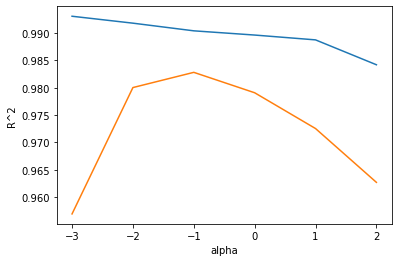

In [16]:
# 그래프 그리기
plt.plot(np.log10(alpha_list),train_score) # 파란색
plt.plot(np.log10(alpha_list),test_score) # 오렌지색
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # 보여지는 결과로는 10^-1 = 0.1 이 최적의 결과,
# 따라서 이 값으로 학습 진행

In [17]:

ridge = Ridge(alpha=0.1) #위에서 찾은 최적의 값으로 알파값 설정
ridge.fit(train_scaled,train_input)
print(ridge.score(train_scaled,train_input))
print(ridge.score(test_scaled,test_input))
# 두 모델의 score가 비슷해 졌고, train 모델이 더 높은 점수를 받음

0.9997708148899255
0.9990978036189785


In [19]:
# 라쏘 모델
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)

print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Text(0, 0.5, 'R^2')

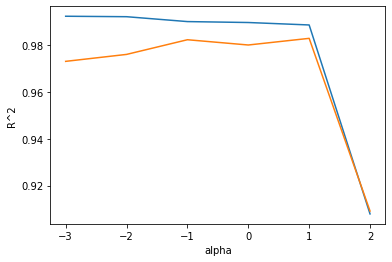

In [24]:
# 라쏘모델의 경우에도 릿지 모델과 같이 alpoha 변수값을 변경하여 규제의 강도를 조절할 수 있다.
# 라쏘모델의 최적의 alpha 값 찾기
train_score=[]
test_score =[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  #라쏘 모델 생성
  lasso = Lasso(alpha=alpha, max_iter=10000)
  #라쏘 모델 훈련
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

# train, test의 alpha_score 그리기
plt.plot(np.log10(alpha_list),train_score) # 파란색
plt.plot(np.log10(alpha_list),test_score) # 오렌지색
plt.xlabel('alpha')
plt.ylabel('R^2')
# 10^1이 되는 구간이 alpha 값이 최소가 되는 구간

In [26]:
# 라쏘모델은 계수값을 0으로 만들수 있다. 그리고 계수는 coef_에 저장되어 있다. (coef는 속성의 갯수만큼 생성되고, 기울기 === 방정식의 차수 를 나타낸다.)
print(np.sum(lasso.coef_==0))
# 앞서서 55개의 특성을 넣었지만, 라쏘모델이 사용한 특성은 3개밖에 없다 -> 라쏘 모델이 유용한 특성을 골라내는 용도로 사용할 수 있다.

52


# 마무리 - 규제
 - 다중회귀 : 여러개의 특성을 사용하는 회귀모델 이다. 특성이 많을수록 선형 모델은 강력한 성능을 낸다.
 - 특성공학 : 주어진 특성을 조합하여 새로운 특성을 만드는 일련의 과정(fit / transform)
 - 모델의 과대적합 제어하기
  > 기존 선형모델의 특성이 1개인데 반해 여러개의 특성을 사용하여 학습을 하였고, 특성 내에서도 조합(특성공학)을 하여 학습을 진행 하였다.<br>
  > 다항특성이 많을수록, 선형회귀 모델은 강력한 성능을 낸다.<br>
  > 하지만 선형회귀 모델의 특성이 너무 많으면 ***과대적합***이 발생할 수 있어 이를 ***규제***할 수단이 있어야 한다.(Ridge / Lasso Model) 
 - 릿지 (ridge)
  > 릿지 모델은 규제가 있는 선형모델로써 선형모델의 계수 (기울기)를 작게 만들어 과대적합을 완화시킨다.<br>
  > `from sklearn.linear_model import Ridge` 로 사용할 수 있다. <br>
  >  alpha 값의 제어를 통해(규제) 과대적합을 해소할 수 있다.<br>
 - 라쏘( Lasso)
  > 라쏘 모델도 위와 마찬가지로 규제를 할 수 있는 선형 회귀 모델이다.<br>
  > 릿지 모델과 다르게 계수(기울기)를 0 으로 만들 수 있는 모델이다.
  ><br>`from sklearn.linear_model import Lasso` 로 불러와 사용할 수 있다.
 - 하이퍼파라미터 : 머신러닝 모델이 학습하지 않고, 사용자가 사전에 직접 지정해야 하는 파라미터로 대표적으로 릿지와 라쏘의 alpha 값이 있다.

# 마무리 - 특성공학
 - PolynomialFeature : 주어진 특성을 조합해 새로운 특성을 만든다.